In [2]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# warnings
import warnings
warnings.filterwarnings('ignore')




C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Data Reading
data= pd.read_csv(r'C:\Users\DELL\Desktop\FinalYear\StressDetection\sentiment_analysis_term_train.csv')

# Copy
stress=data.copy()

# Data
stress.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,neg
1,बैटरी लाइफ बहुत बढिया है।,pos
2,हकीकत ये है कि मेटल के नाम पर फोन में सिर्फ चा...,neu
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,pos
4,अच्छी बैटरी क्षमता है।,pos


In [3]:
# Statistical Information
stress.describe()

,text,label
count,2497,2497
unique,2497,3
top,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,pos
freq,1,1147


In [4]:
# Delete rows with 'neu' label
data = data[data['label'] != 'neu']

# Convert 'pos' to 1 and 'neg' to 0
data['label'] = data['label'].map({'pos': 1, 'neg': 0})

# Print the resulting DataFrame
data.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,0
1,बैटरी लाइफ बहुत बढिया है।,1
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,1
4,अच्छी बैटरी क्षमता है।,1
5,बैटरी लाइफ की बात करें तो हमारे लगातार वीडियो ...,1


In [5]:
from googletrans import Translator

# Initialize translator
translator = Translator()

# Function to translate text
def translate_text(text, source_lang):
    try:
        translation = translator.translate(text, src=source_lang, dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

# Apply translation using Google Translate
data['text'] = data.apply(lambda row: translate_text(row['text'], source_lang="hi"), axis=1)

# Remove rows with translation errors
data = data.dropna(subset=['text'])


Translation error: The read operation timed out


In [6]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
stress_c= pd.read_csv(r'C:\Users\DELL\Desktop\FinalYear\StressDetection\Stress.csv')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [7]:
# Select only 'text' and 'label' columns
stress = stress[['text', 'label']]

# Print the resulting DataFrame
stress.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [3]:
# # Concatenate the rows of 'stree' onto 'data'
# merged_data = pd.concat([data, stress], ignore_index=True)

# # Print the concatenated DataFrame
# print(merged_data)
REDDIT = r'C:\Users\DELL\Desktop\FinalYear\StressDetection\Reddit_Combi.csv'
USECOLS = ['Body_Title', 'label']
merged_data = pd.read_csv(filepath_or_buffer=REDDIT, sep=';', usecols=USECOLS)
merged_data.head()
# merged_data=pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi.csv')
# merged_data = merged_data[['Body_title', 'label']]
# merged_data.head()

,Body_Title,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [13]:
# Calculate the percentage of each label
label_counts = merged_data['label'].value_counts(normalize=True) * 100

# Print the percentage of each label
print("Percentage of label 0:", label_counts[0])
print("Percentage of label 1:", label_counts[1])

Percentage of label 0: 12.103746397694524
Percentage of label 1: 87.89625360230548


In [14]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
# Defining function for preprocessing
def preprocess(text, remove_digits=True):
    text = re.sub(r'\W+', ' ', text)  # Using raw string literal
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"(?<!\w)\d+", "", text)
    text = re.sub(r"-(?!\w)|(?<!\w)-", "", text)
    text = text.lower()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = ' '.join([word for word in nopunc.split()
                       if word.lower() not in stopwords.words('english')])
    return nopunc

# Defining a function for lemmatization
def lemmatize(words):
    words = nlp(words)
    lemmas = []
    for word in words:
        lemmas.append(word.lemma_)
    return lemmas

# Converting them into string
def listtostring(s):
    str1 = ' '
    return str1.join(s)

def clean_text(input):
    word = preprocess(input)
    lemmas = lemmatize(word)
    return listtostring(lemmas)


In [4]:
# Creating a feature to store clean texts
# merged_data['clean_text']=merged_data['Body_Title'].apply(clean_text)
# merged_data.to_csv('Reddit_Combi_clean_text.csv', index=False)
merged_data= pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')
merged_data.head()


,Body_Title,label,clean_text
0,Envy to other is swallowing me Im from develop...,1,envy swallow I m developingcountry indonesia t...
1,Nothin outta the ordinary. Paradise. Job stres...,1,nothin outta ordinary paradise job stress life...
2,Almost 49 and the chasm of emptiness has never...,1,almost chasm emptiness never greater diagnose ...
3,I’m happy again After my closest friend left m...,0,happy close friend leave april finally let go ...
4,Is it possible to recover from such a traumati...,1,possible recover traumatic childhood yet feel ...


In [5]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch


# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [6]:
# Defining target & feature for ML model building
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from time import time

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='tfidf'):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
    elif vectorizer == 'bow':
        vector = CountVectorizer()
    elif vectorizer == 'onehot':
        vector = OneHotEncoder()
        x_train = vector.fit_transform(x_train).toarray()
        x_test = vector.transform(x_test).toarray()
    
    else:
        raise ValueError("Vectorizer should be one of 'tfidf', 'bow', or 'onehot'.")

    if vectorizer != 'onehot':
        x_train = vector.fit_transform(x_train)
        x_test = vector.transform(x_test)
 
    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print('Time taken:', time() - t0)
    print('Accuracy:', acc)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Define your model
model = LogisticRegression()

# Train and evaluate the model using TF-IDF
true_labels, predicted_labels, accuracy = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='tfidf')


# Train and evaluate the model using bag-of-words
#true_labels, predicted_labels, accuracy = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='bow')

# Train and evaluate the model using one-hot encoding
#true_labels, predicted_labels, accuracy = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer='onehot')




Time taken: 0.0356295108795166
Accuracy: 0.8928
Confusion Matrix:
 [[  7  65]
 [  2 551]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.10      0.17        72
           1       0.89      1.00      0.94       553

    accuracy                           0.89       625
   macro avg       0.84      0.55      0.56       625
weighted avg       0.88      0.89      0.85       625



In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
    elif vectorizer == 'bow':
        vector = CountVectorizer()
    elif vectorizer == 'onehot':
        raise ValueError("One-hot encoding is not applicable for text data.")
    else:
        raise ValueError("Vectorizer should be one of 'tfidf', 'bow', or 'onehot'.")

    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train.toarray(), y_train)  # Convert sparse matrix to dense array
    y_pred = model.predict(x_test.toarray())  # Convert sparse matrix to dense array
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    acc, f1 = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'tfidf')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                     Model  Accuracy  F1 Score
0      Logistic Regression    0.8928  0.854000
1                      SVM    0.8976  0.863663
2            Decision Tree    0.8608  0.859507
3            Random Forest    0.8848  0.830721
4                 AdaBoost    0.9136  0.905074
5  Multinomial Naive Bayes    0.8848  0.830721
6     Gaussian Naive Bayes    0.7872  0.797743


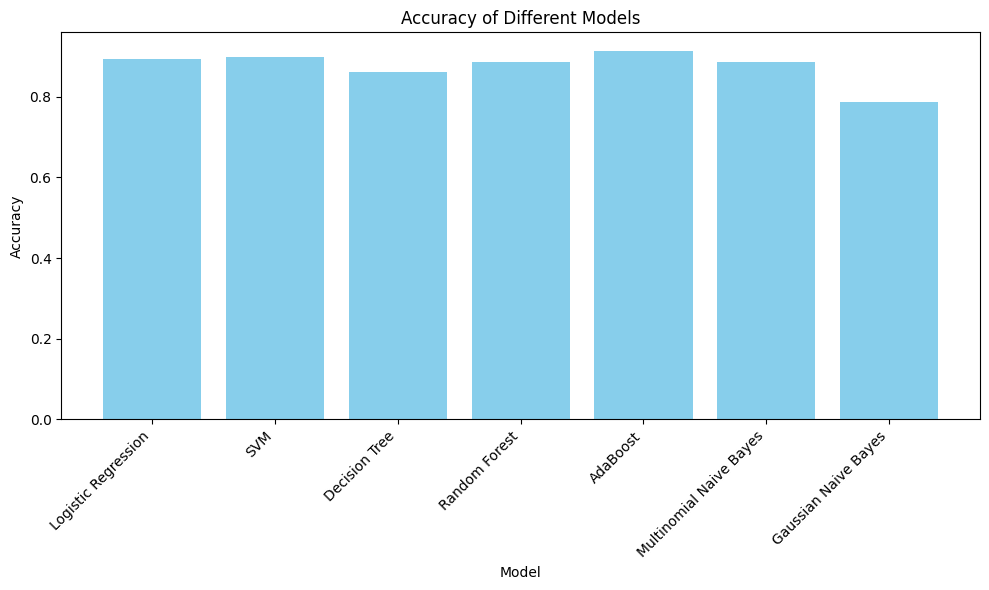

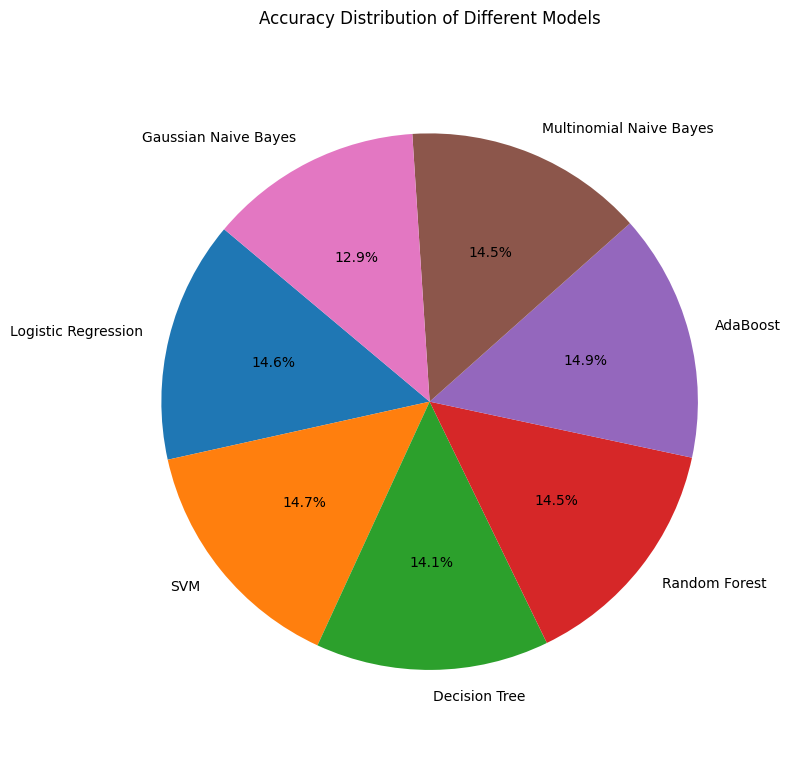

In [8]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(results_df['Accuracy'], labels=results_df['Model'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Accuracy Distribution of Different Models')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
    elif vectorizer == 'bow':
        vector = CountVectorizer()
    else:
        raise ValueError("Vectorizer should be one of 'tfidf' or 'bow'.")

    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train.toarray(), y_train)  # Convert sparse matrix to dense array
    y_pred = model.predict(x_test.toarray())  # Convert sparse matrix to dense array
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB() 
}

results = []

for name, model in models.items():
    acc, f1 = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'bow')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                     Model  Accuracy  F1 Score
0      Logistic Regression    0.9264  0.922325
1                      SVM    0.9056  0.876989
2            Decision Tree    0.8784  0.874407
3            Random Forest    0.8848  0.830721
4                 AdaBoost    0.9200  0.911332
5  Multinomial Naive Bayes    0.9104  0.888508
6     Gaussian Naive Bayes    0.7904  0.799830


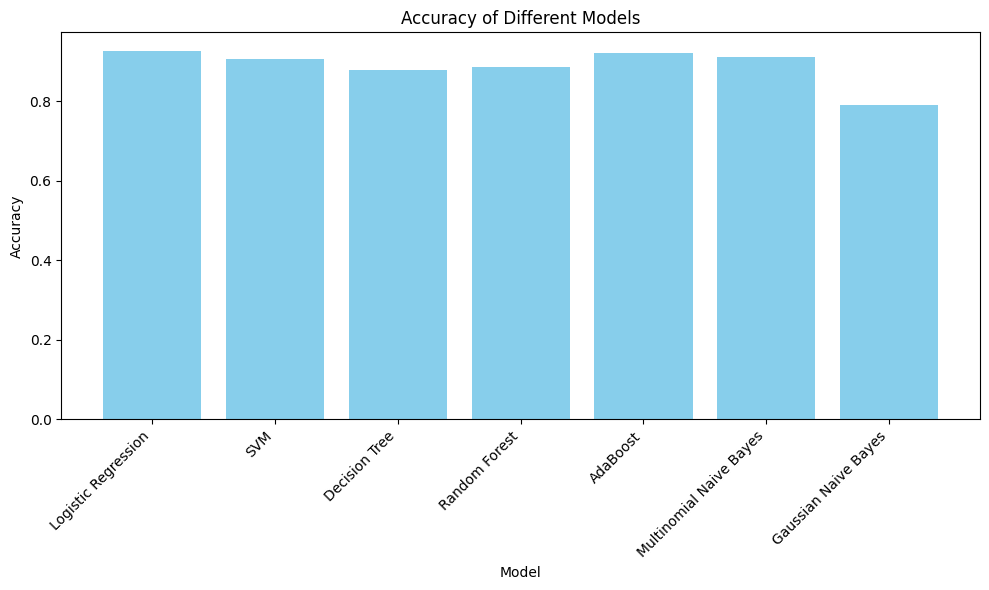

In [10]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd
import numpy as np

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer, ngram_range=(1, 1)):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer(ngram_range=ngram_range)
    elif vectorizer == 'ngrams':
        vector = CountVectorizer(ngram_range=ngram_range)
    else:
        raise ValueError("Vectorizer should be one of 'tfidf' or 'ngrams'.")

    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    # Fitting training data into the model & predicting
    t0 = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1

# Example usage:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
    "Multinomial Naive Bayes": MultinomialNB(),
}

ngram_range = (1, 2)  # Example: unigrams and bigrams

results = []

for name, model in models.items():
    acc, f1 = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'ngrams', ngram_range=ngram_range)
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                     Model  Accuracy  F1 Score
0      Logistic Regression    0.9312  0.923404
1                      SVM    0.8976  0.859441
2            Decision Tree    0.8720  0.866869
3            Random Forest    0.8848  0.830721
4                 AdaBoost    0.9216  0.915638
5  Multinomial Naive Bayes    0.8848  0.830721


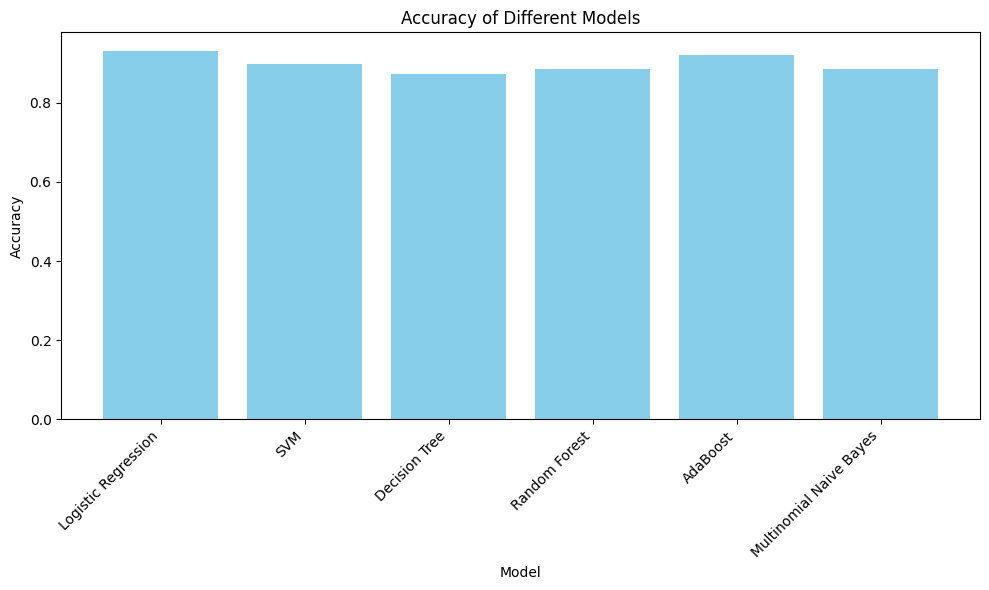

In [12]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def one_hot_encode_texts(texts):
    # Create a CountVectorizer to build the vocabulary
    vectorizer = CountVectorizer(binary=True)
    one_hot_encoded = vectorizer.fit_transform(texts).toarray()
    return one_hot_encoded, vectorizer

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test, vectorizer):
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer()
        x_train = vector.fit_transform(x_train)
        x_test = vector.transform(x_test)
    elif vectorizer == 'bow':
        vector = CountVectorizer()
        x_train = vector.fit_transform(x_train)
        x_test = vector.transform(x_test)
    elif vectorizer == 'onehot':
        x_train, vector = one_hot_encode_texts(x_train)
        x_test = vector.transform(x_test).toarray()
    else:
        raise ValueError("Vectorizer should be one of 'tfidf', 'bow', or 'onehot'.")

    # Fitting training data into the model & predicting
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return acc, f1, conf

# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Check the column names
print(df.columns)

# Assuming the correct column name is 'body_title' and 'label'
x = df['clean_text']
y = df['label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    acc, f1, conf = train_and_evaluate_model(model, x_train, x_test, y_train, y_test, 'onehot')
    results.append([name, acc, f1, conf])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Confusion Matrix"])
print(results_df)


Index(['Body_Title', 'label', 'clean_text'], dtype='object')
                     Model  Accuracy  F1 Score       Confusion Matrix
0      Logistic Regression    0.9264  0.919822  [[37, 35], [11, 542]]
1                      SVM    0.9072  0.878219   [[14, 58], [0, 553]]
2            Decision Tree    0.8720  0.870402  [[30, 42], [38, 515]]
3            Random Forest    0.8864  0.834583    [[1, 71], [0, 553]]
4                 AdaBoost    0.9120  0.902895  [[31, 41], [14, 539]]
5  Multinomial Naive Bayes    0.8944  0.857281    [[8, 64], [2, 551]]
6     Gaussian Naive Bayes    0.7920  0.800873  [[15, 57], [73, 480]]


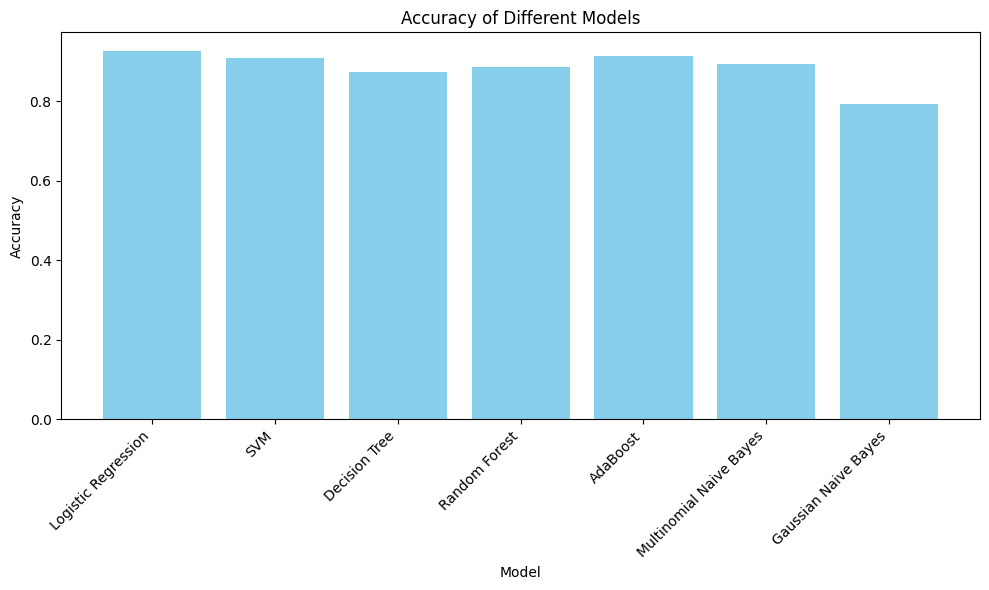

In [14]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [15]:
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import pandas as pd
import psutil
import os

def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"Memory usage: {process.memory_info().rss / (1024 ** 2)} MB")

# Load pre-trained BERT model and tokenizer
print("Loading BERT model and tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Load dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Check the column names
print(df.columns)

# Assuming the correct column names are 'clean_text' and 'label'
x = df['clean_text'].tolist()
y = df['label'].tolist()

# Use a smaller subset for debugging
x = x[:100]  # Using only 100 samples for initial debugging
y = y[:100]

print("Dataset loaded. Generating BERT embeddings...")

# Function to get BERT embeddings
def get_bert_embeddings(texts, batch_size=8):  # Reduce batch size further
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)
        print_memory_usage()  # Print memory usage for debugging
    return np.vstack(embeddings)

# Get BERT embeddings for the dataset
bert_embeddings = get_bert_embeddings(x)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(bert_embeddings, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


Loading BERT model and tokenizer...
Index(['Body_Title', 'label', 'clean_text'], dtype='object')
Dataset loaded. Generating BERT embeddings...
Memory usage: 1045.87890625 MB
Memory usage: 1066.06640625 MB
Memory usage: 1046.328125 MB
Memory usage: 1046.2890625 MB
Memory usage: 1056.328125 MB
Memory usage: 1043.65625 MB
Memory usage: 1032.390625 MB
Memory usage: 1035.796875 MB
Memory usage: 1051.015625 MB
Memory usage: 1056.84765625 MB
Memory usage: 1093.4453125 MB
Memory usage: 1116.3359375 MB
Memory usage: 994.82421875 MB
                  Model  Accuracy  F1 Score
0   Logistic Regression      0.95  0.925641
1                   SVM      0.95  0.925641
2         Decision Tree      0.70  0.782353
3         Random Forest      0.95  0.925641
4              AdaBoost      0.90  0.900000
5  Gaussian Naive Bayes      0.90  0.900000


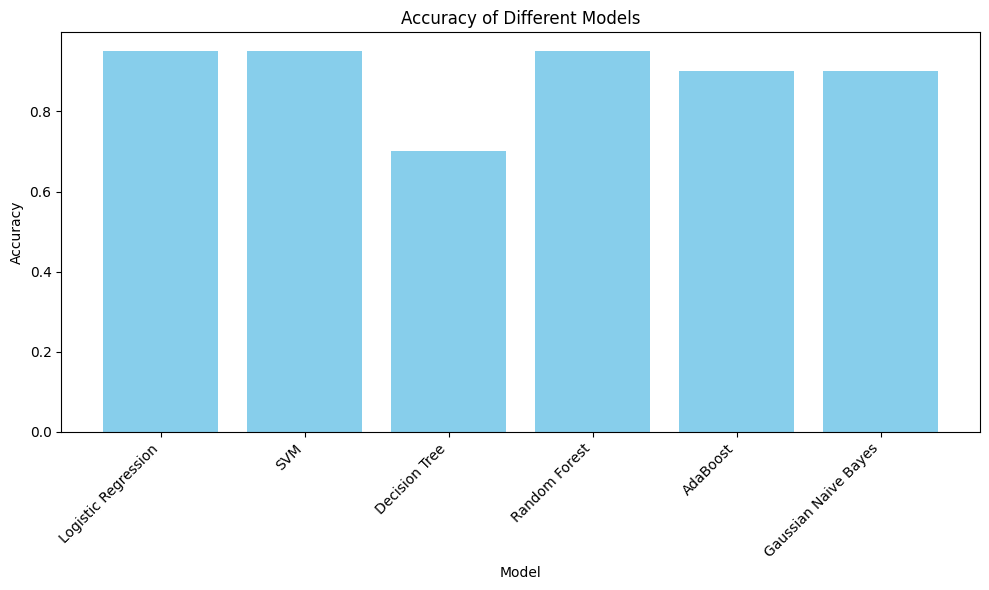

In [16]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [17]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Example dataset (replace with your own data)
# x = ["text document 1", "text document 2", ...]
# y = [0, 1, ...]  # Labels
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Split the data into features (X) and target labels (y)
x = df['clean_text']
y = df['label']

# Tokenize documents and prepare tagged data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(x)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# Get document embeddings
doc_embeddings = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

# Convert embeddings to numpy array
doc_embeddings = np.array(doc_embeddings)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(doc_embeddings, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for class imbalance
    results.append([name, accuracy, f1])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])
print(results_df)


                  Model  Accuracy  F1 Score
0   Logistic Regression    0.8848  0.861660
1                   SVM    0.8960  0.878457
2         Decision Tree    0.8464  0.854351
3         Random Forest    0.9040  0.883386
4              AdaBoost    0.9008  0.898911
5  Gaussian Naive Bayes    0.8352  0.856051


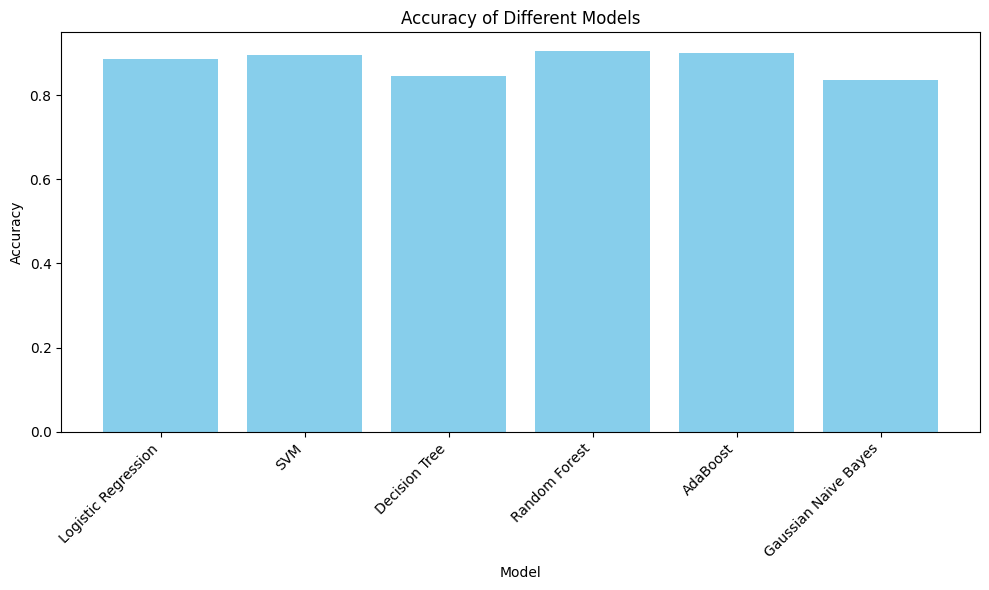

In [18]:
import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [19]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Split the data into features (X) and target labels (y)
x = df['clean_text']
y = df['label']

# Tokenize documents and prepare tagged data for Doc2Vec
tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(x)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# Get document embeddings
doc_embeddings = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

# Convert embeddings to numpy array
doc_embeddings = np.array(doc_embeddings)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(doc_embeddings, y, test_size=0.2, random_state=42)

# Initialize Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)

# Train the classifier
gpc.fit(x_train, y_train)

# Predict on test set
y_pred = gpc.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score

# Print accuracy and F1 score
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9312
F1 Score: 0.9281859020799651


In [ ]:
# //ignore this cell


from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Example dataset (replace with your own data)
df = pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Reddit_Combi_clean_text.csv')

# Split the data into features (X) and target labels (y)
x = df['clean_text']
y = df['label']

# Tokenize input texts
x_tokenized = tokenizer(x.tolist(), padding=True, truncation=True, return_tensors='pt')

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tokenized['input_ids'], y, test_size=0.2, random_state=42)

# Define optimizer and criterion
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Convert y_train to a list
y_train = y_train.tolist()

# Training loop
model.train()
for epoch in range(3):  # Adjust as needed
    for i in range(0, len(x_train), 32):  # Mini-batch size of 32, adjust as needed
        batch_x = x_train[i:i+32]
        batch_y = torch.tensor(y_train[i:i+32]).long()  # Convert to tensor
        optimizer.zero_grad()
        outputs = model(input_ids=batch_x, labels=batch_y)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(input_ids=x_test)
    predictions = torch.argmax(outputs.logits, dim=1).numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Python312\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


: 

In [6]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from googletrans import Translator

def get_bert_embeddings(texts): 
    # Load pre-trained BERT model and tokenizer 
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased') 
    # Define a function to obtain BERT embeddings for a single text 
    def get_single_bert_embedding(text): 
        input_ids = tokenizer([text], return_tensors='pt', padding=True, truncation=True)['input_ids'] 
        with torch.no_grad(): 
            outputs = model(input_ids) 
            embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy() 
        return embeddings 
    # Obtain BERT embeddings for all texts 
    embeddings_list = [get_single_bert_embedding(text) for text in texts] 
    return embeddings_list 

# Load the dataset 
REDDIT = r'C:\Users\DELL\Desktop\FinalYear\StressDetection\Twitter_Full.csv'
USECOLS = ['text', 'labels']
df = pd.read_csv(filepath_or_buffer=REDDIT, sep=';', usecols=USECOLS)

# Split the data into features (X) and target labels (y) 
X = df['text'] 
y = df['labels'] 

# Split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Obtain BERT embeddings for training and testing data 
x_train_embeddings = get_bert_embeddings(x_train.tolist()) 
x_test_embeddings = get_bert_embeddings(x_test.tolist())

# Define and train classifiers 
# Logistic Regression 
lr_classifier = LogisticRegression(max_iter=1000) 
lr_classifier.fit(x_train_embeddings, y_train) 

# Random Forest 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier.fit(x_train_embeddings, y_train) 

# Support Vector Machine 
svm_classifier = SVC() 
svm_classifier.fit(x_train_embeddings, y_train) 

# Decision Tree 
dt_classifier = DecisionTreeClassifier() 
dt_classifier.fit(x_train_embeddings, y_train) 

# AdaBoost 
adb_classifier = AdaBoostClassifier(n_estimators=100) 
adb_classifier.fit(x_train_embeddings, y_train) 

# Multinomial Naive Bayes 
mnb_classifier = MultinomialNB() 
x_train_non_negative = [[max(0, val) for val in emb] for emb in x_train_embeddings] 
x_test_non_negative = [[max(0, val) for val in emb] for emb in x_test_embeddings] 
mnb_classifier.fit(x_train_non_negative, y_train) 

# Function to translate text from Hindi to English 
def translate_to_english(text): 
    translator = Translator() 
    translation = translator.translate(text, src='hi', dest='en') 
    return translation.text 

# Function to predict stressfulness using Support Vector Machine (SVM) classifier 
def predict_stressfulness(text, language): 
    if language == 'hindi': 
        text = translate_to_english(text) 
    embeddings = get_bert_embeddings([text])  # Wrap 'text' in a list
    prediction = svm_classifier.predict(embeddings)[0]  # Pass embeddings directly
    return prediction

# Test the predict_stressfulness function
text = "happy"
language = "english"
result = predict_stressfulness(text, language)
if result == 1: 
    print("Person is stressed") 
else: 
    print("Person is not stressed")


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [52]:
text="Harmony" 
language="english" 
result = predict_stressfulness(text,language) 
if result==1: 
    print("Person is stressed") 
else: 
    print("Person is not stressed")


Person is stressed
